# K_Means_meteo_1.0

En este script se va a hacer uso de la utilidad K-Means contenida en SKLEARN para encontrar “K” grupos (clusters) entre los atributos atmosfericos.

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
 
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [14]:
df_inc=pd.read_csv('../../DATASETS/AHOGADOS/CSV/historico_inc_est_meteo_codigos_test.csv',sep='|',error_bad_lines=False)

In [15]:
df_inc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5468 entries, 0 to 5467
Data columns (total 47 columns):
Fecha              5468 non-null object
Mes                5468 non-null float64
IdAhogado          5468 non-null int64
IdPersona          5468 non-null int64
Localidad          5468 non-null object
Provincia          5468 non-null object
CCAA               5468 non-null object
Hora               4477 non-null object
Latitud_inc        5468 non-null float64
Longitud_inc       5468 non-null float64
Sexo               5467 non-null object
Edad               4510 non-null float64
Nacionalidad       5468 non-null object
ID                 5468 non-null int64
Estacion           5468 non-null object
Estado             5468 non-null object
Latitud_est        5468 non-null float64
Longitud_est       5468 non-null float64
T_med              5468 non-null float64
T_max              5468 non-null float64
T_min              5468 non-null float64
Precipitaciones    5468 non-null float64
Presio

In [16]:
df_inc.columns

Index(['Fecha', 'Mes', 'IdAhogado', 'IdPersona', 'Localidad', 'Provincia',
       'CCAA', 'Hora', 'Latitud_inc', 'Longitud_inc', 'Sexo', 'Edad',
       'Nacionalidad', 'ID', 'Estacion', 'Estado', 'Latitud_est',
       'Longitud_est', 'T_med', 'T_max', 'T_min', 'Precipitaciones', 'Presion',
       'Dir_viento', 'V_Viento', 'Nubosidad', 'ProfNievecm', 'InsolacHoras',
       'Distancia', 'IdActividad', 'IdCausa', 'IdDeteccion', 'IdFactor',
       'IdInterv', 'IdOrigen', 'IdPronostico', 'Mortal', 'IdReanima',
       'IdRiesgo', 'IdTipo', 'IdVigilancia', 'IdCCAA', 'Poblacion', 'IdProv',
       'PobProv', 'Costa', 'IdLocal'],
      dtype='object')

In [17]:
df_inc_clust=df_inc[['Mes', 'T_med', 'T_max', 'T_min', 'Precipitaciones', 'Presion',
       'Dir_viento', 'V_Viento', 'Nubosidad', 'ProfNievecm', 'IdPronostico']]

In [18]:
df_inc_clust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5468 entries, 0 to 5467
Data columns (total 11 columns):
Mes                5468 non-null float64
T_med              5468 non-null float64
T_max              5468 non-null float64
T_min              5468 non-null float64
Precipitaciones    5468 non-null float64
Presion            5468 non-null float64
Dir_viento         5463 non-null float64
V_Viento           5468 non-null int64
Nubosidad          5468 non-null float64
ProfNievecm        4218 non-null float64
IdPronostico       5468 non-null int64
dtypes: float64(9), int64(2)
memory usage: 470.0 KB


In [19]:
df_inc_clust.IdPronostico.unique()

array([ 7,  8, 11,  2,  9,  1,  3, 10,  0], dtype=int64)

In [20]:
print(df_inc_clust.groupby('IdPronostico').size())

IdPronostico
0        8
1     1567
2      473
3       40
7     2526
8      649
9       86
10      93
11      26
dtype: int64


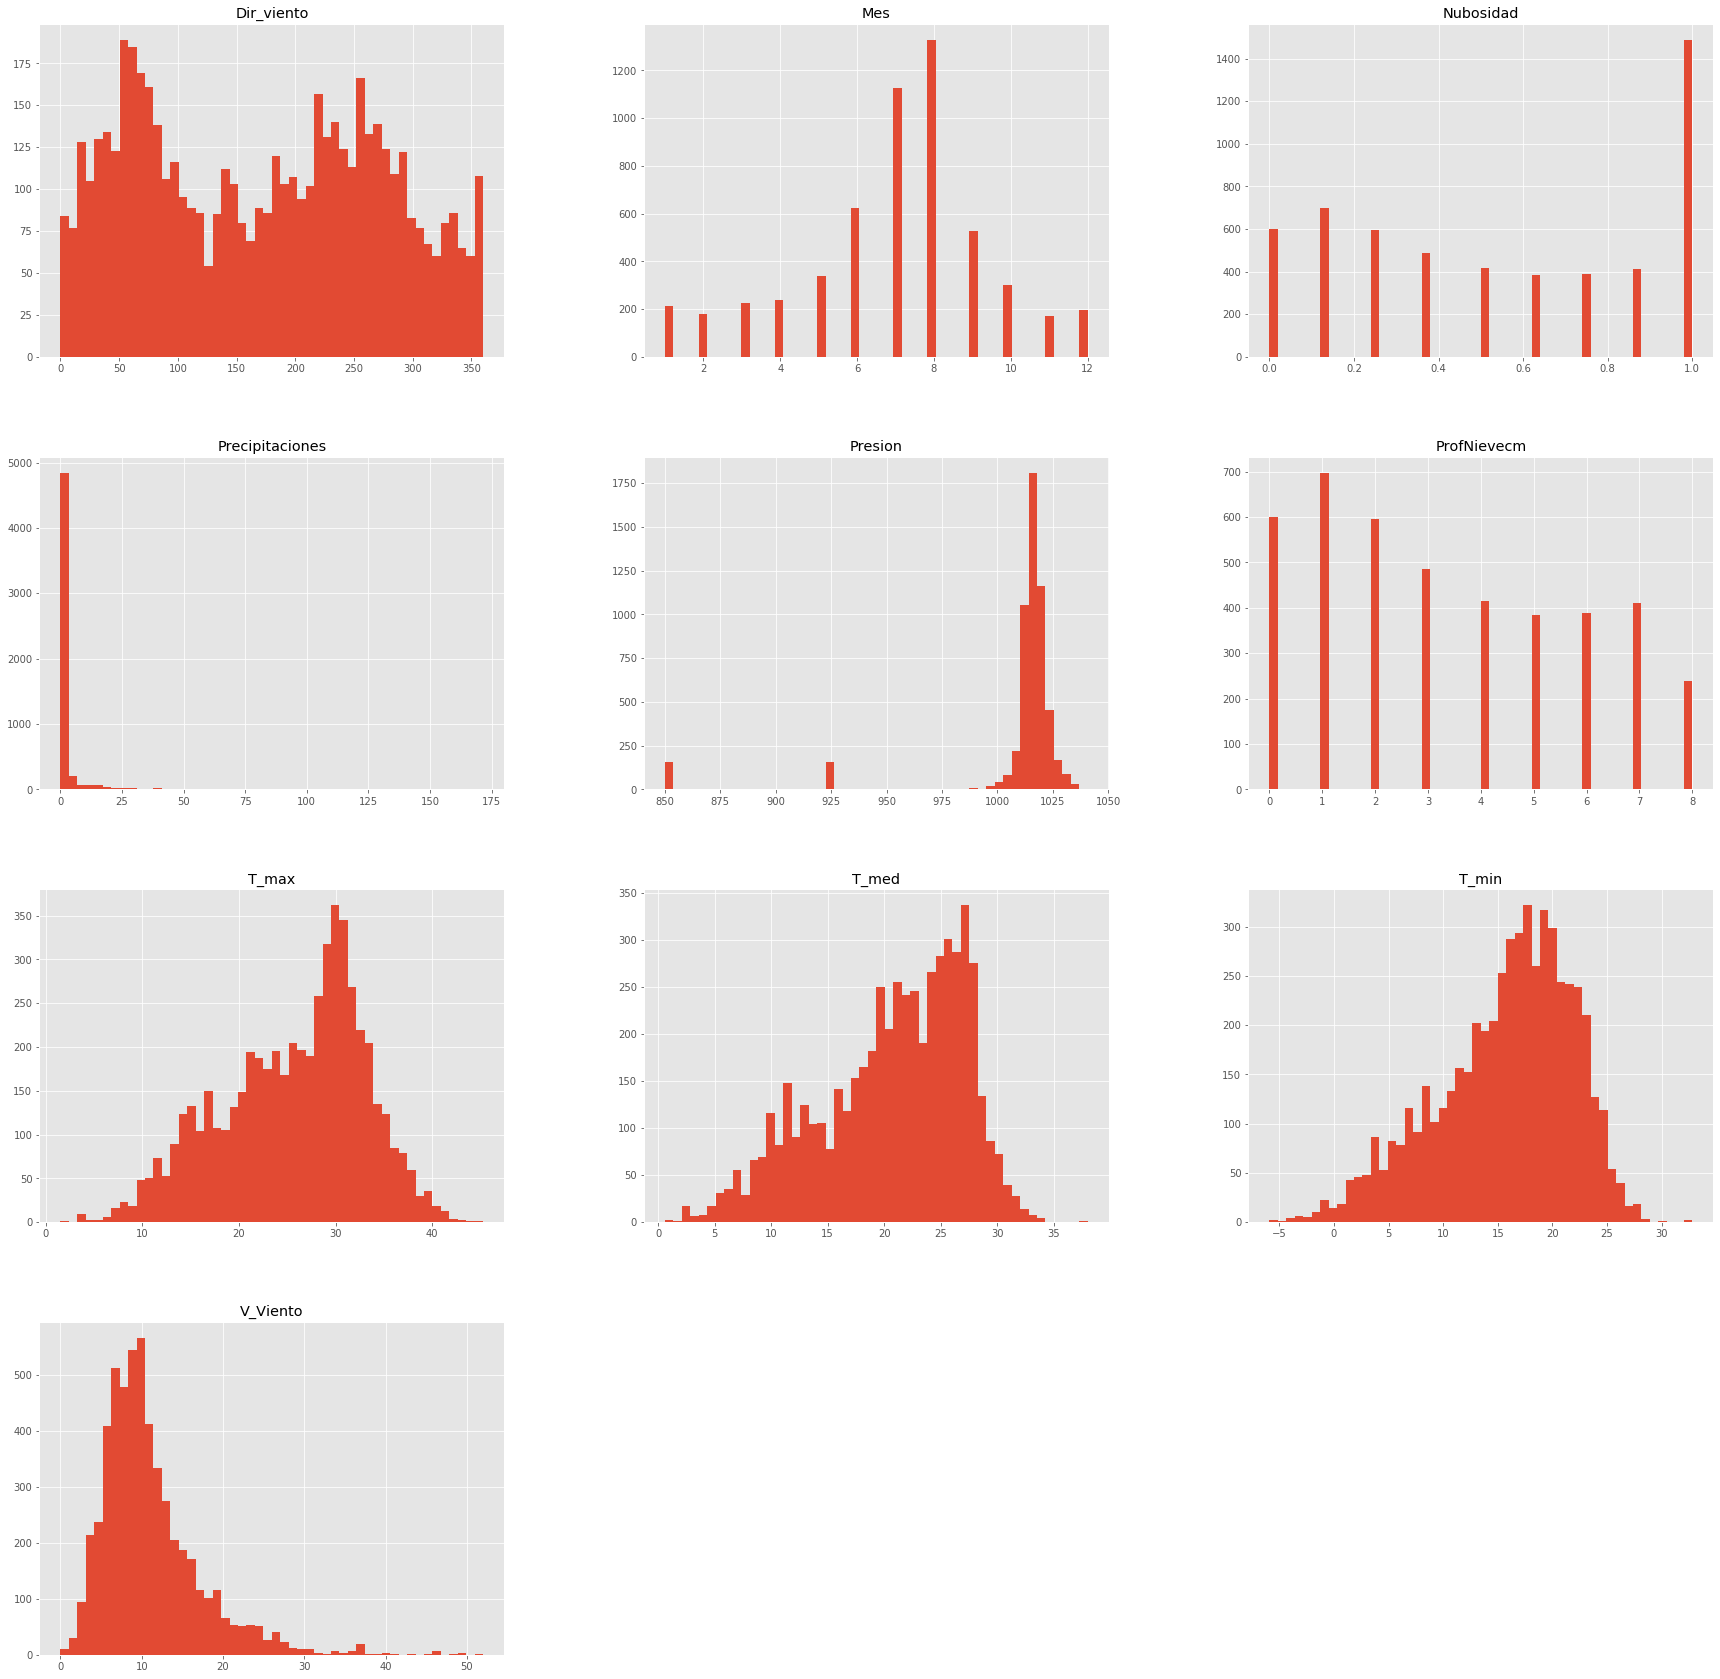

In [21]:
df_inc_clust.drop(['IdPronostico'],1).hist(figsize=(30,30), bins=50)
plt.show()

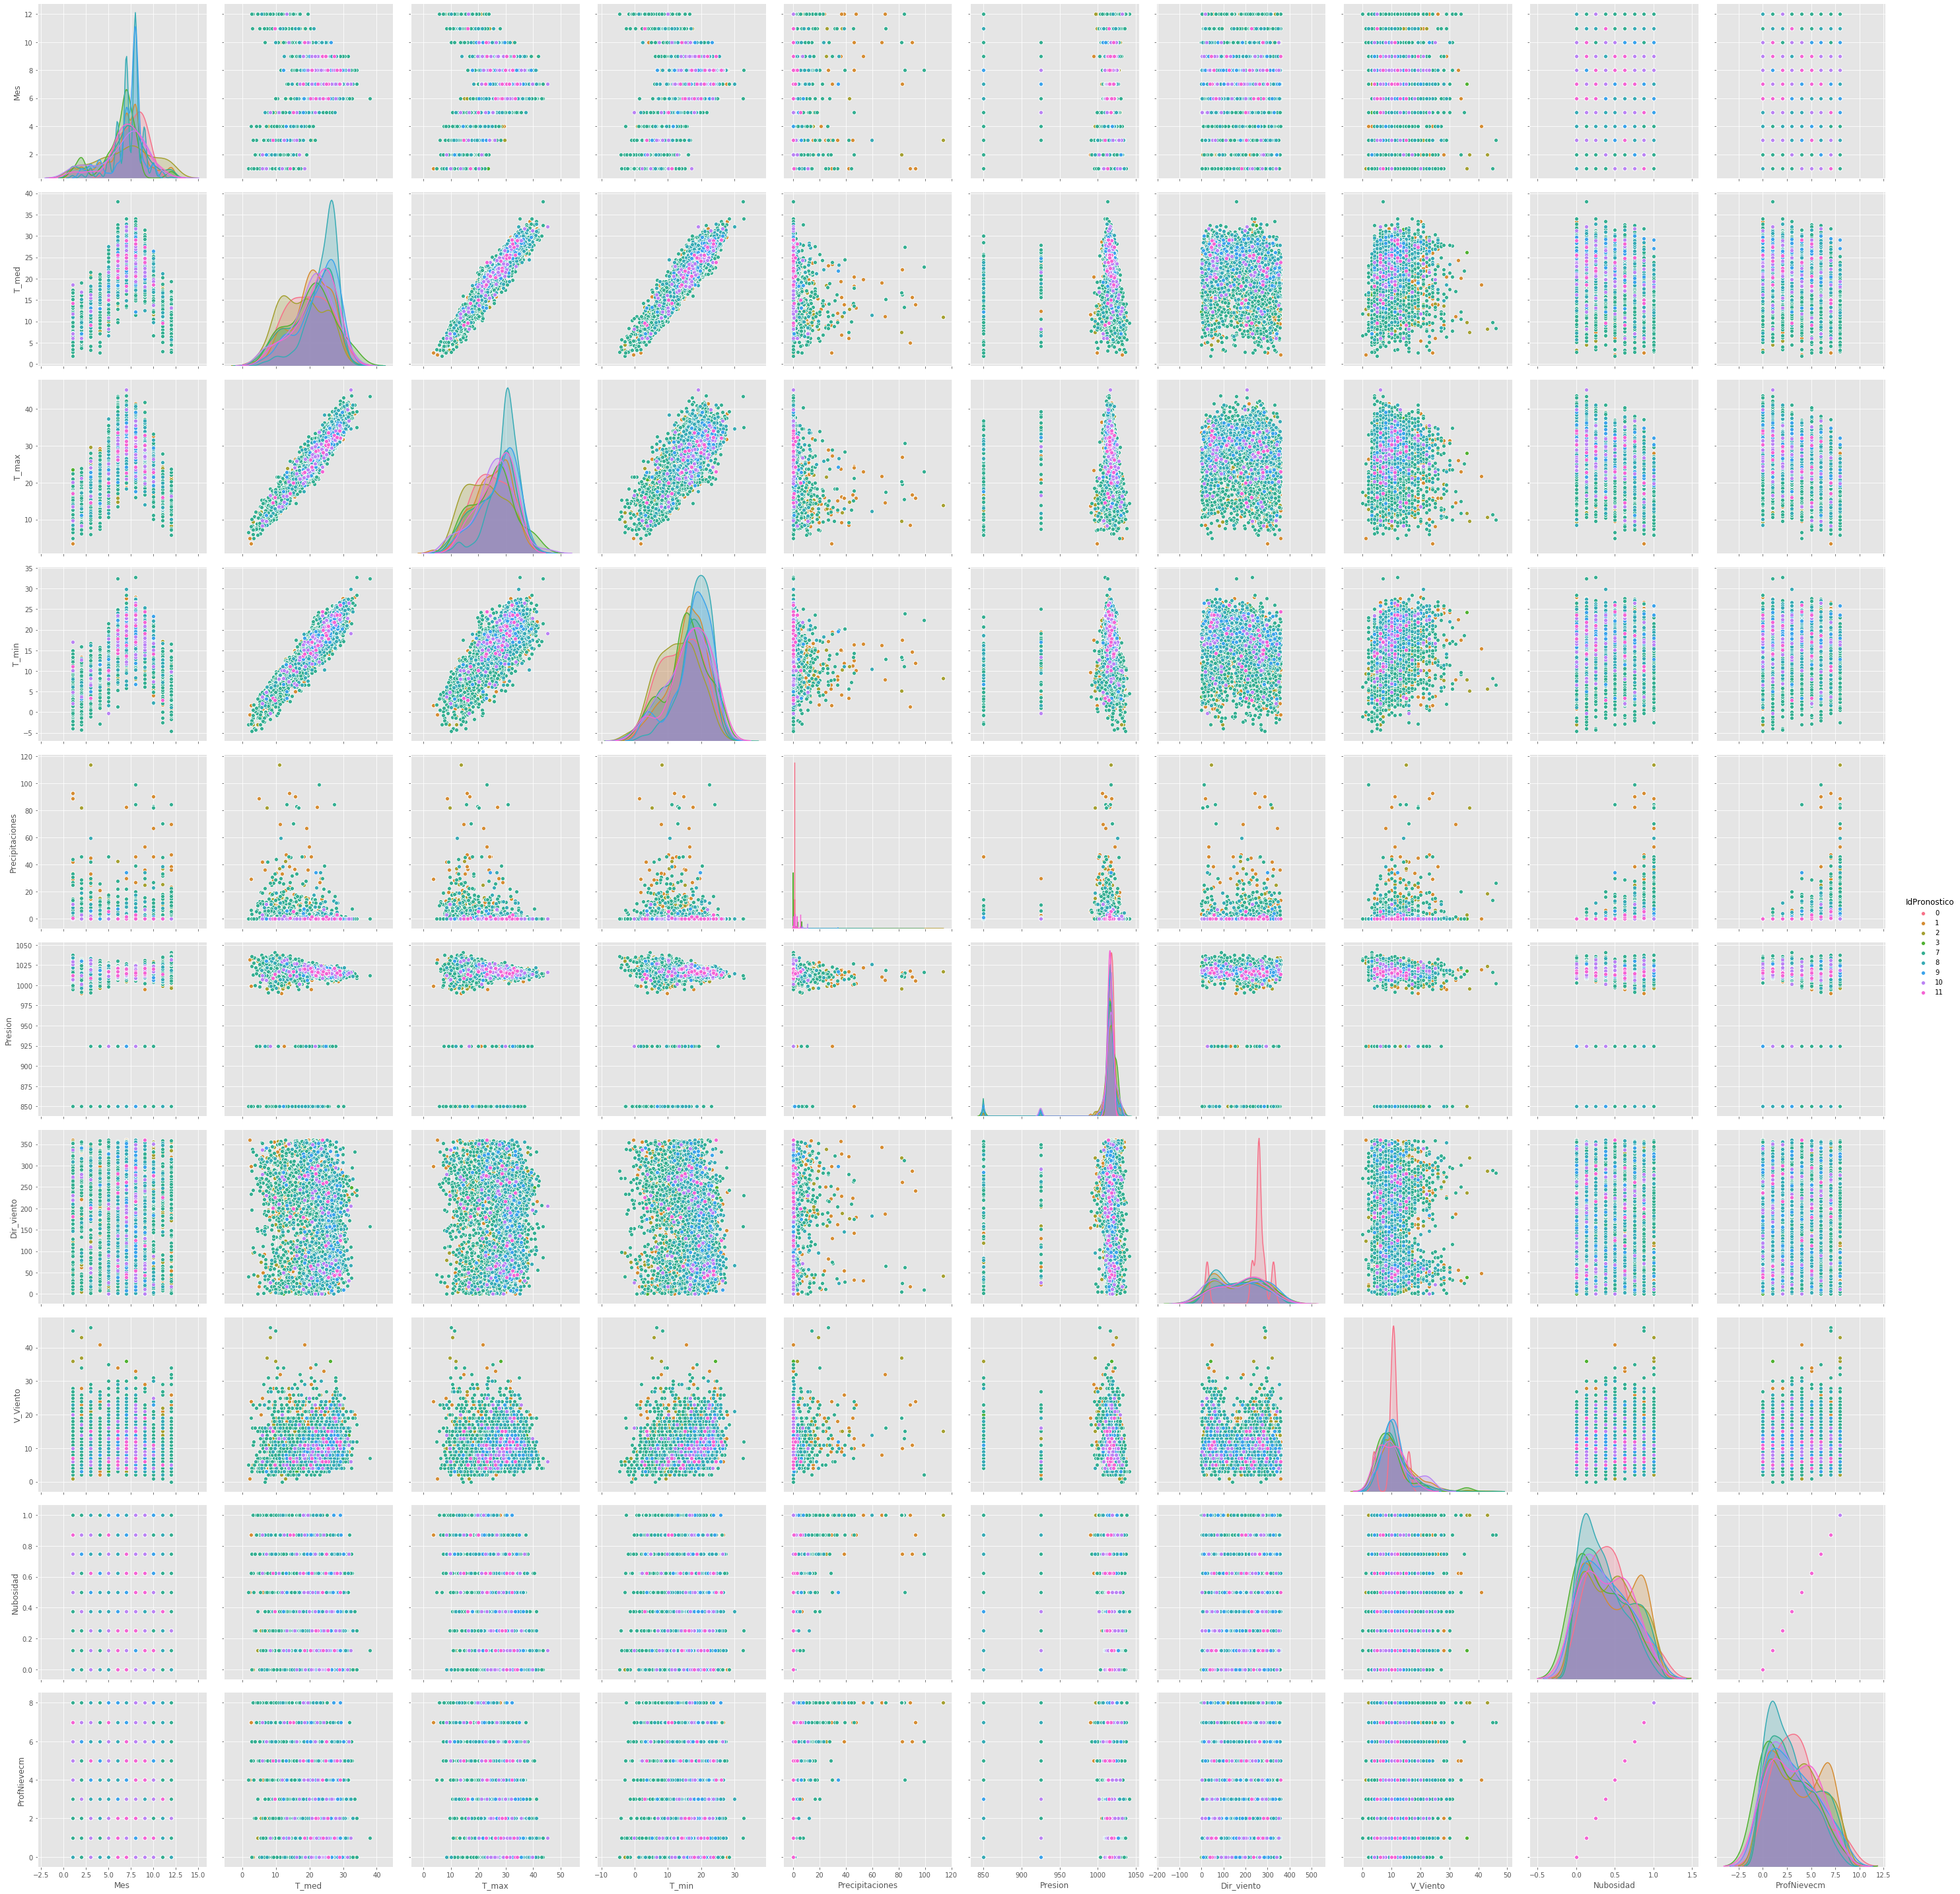

In [22]:
sb.pairplot(df_inc_clust.dropna(), hue='IdPronostico',height=4,vars=df_inc_clust.drop(['IdPronostico'],1),kind='scatter')


In [23]:
df_inc_clust['IdPronostico'].unique()

array([ 7,  8, 11,  2,  9,  1,  3, 10,  0], dtype=int64)

In [24]:
column_means = df_inc_clust.drop(['IdPronostico'],1).mean()
df_inc_clust = df_inc_clust.fillna(column_means)

In [25]:
df_inc_clust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5468 entries, 0 to 5467
Data columns (total 11 columns):
Mes                5468 non-null float64
T_med              5468 non-null float64
T_max              5468 non-null float64
T_min              5468 non-null float64
Precipitaciones    5468 non-null float64
Presion            5468 non-null float64
Dir_viento         5468 non-null float64
V_Viento           5468 non-null int64
Nubosidad          5468 non-null float64
ProfNievecm        5468 non-null float64
IdPronostico       5468 non-null int64
dtypes: float64(9), int64(2)
memory usage: 470.0 KB


In [26]:
df_inc_clust.describe()

,Mes,T_med,T_max,T_min,Precipitaciones,Presion,Dir_viento,V_Viento,Nubosidad,ProfNievecm,IdPronostico
count,5468.000000,5468.000000,5468.000000,5468.000000,5468.000000,5468.000000,5468.000000,5468.000000,5468.000000,5468.000000,5468.000000
mean,6.974031,20.689100,25.667721,15.708998,2.496928,1009.365984,170.457304,11.159108,0.549630,3.329303,5.028713
std,2.483320,6.356178,7.361037,6.149915,10.590294,31.824045,101.792734,5.993863,0.367883,2.194060,3.032248
min,1.000000,0.600000,1.500000,-5.900000,0.000000,850.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,16.600000,20.600000,11.900000,0.000000,1013.200000,73.000000,7.000000,0.250000,2.000000,1.000000
50%,7.000000,21.800000,27.000000,16.700000,0.000000,1016.100000,173.000000,10.000000,0.500000,3.329303,7.000000
75%,8.000000,25.800000,31.000000,20.300000,0.000000,1019.300000,257.000000,13.000000,1.000000,5.000000,7.000000
max,12.000000,38.000000,45.300000,32.800000,171.600000,1040.800000,360.000000,52.000000,1.000000,8.000000,11.000000


In [27]:
X = np.array(df_inc_clust.drop(['IdPronostico'],1))
y = np.array(df_inc_clust['IdPronostico'])
X.shape

(5468, 10)

In [29]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]

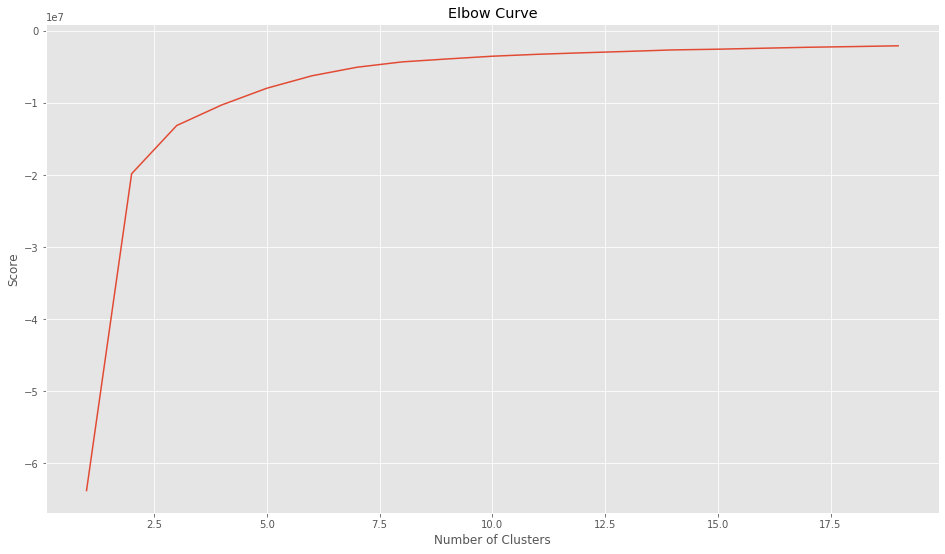

In [30]:

score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [31]:
kmeans = KMeans(n_clusters=5).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[6.89655172e+00 2.01586883e+01 2.53311697e+01 1.49855308e+01
  3.08661258e+00 1.01300825e+03 2.35323529e+02 1.13502366e+01
  5.73360379e-01 3.42157728e+00]
 [7.24319629e+00 2.19772438e+01 2.66425594e+01 1.73067169e+01
  2.36010423e+00 1.01681448e+03 5.21583671e+01 1.20208454e+01
  5.09626520e-01 3.13043199e+00]
 [6.65861027e+00 1.84720040e+01 2.33141994e+01 1.36304129e+01
  2.85609265e+00 1.00825327e+03 3.15051611e+02 1.07583082e+01
  5.70241692e-01 3.48480401e+00]
 [7.30898876e+00 1.79241573e+01 2.45814607e+01 1.12617978e+01
  2.34438202e+00 8.70646067e+02 1.27769183e+02 9.92696629e+00
  7.38061798e-01 3.46418639e+00]
 [6.88542621e+00 2.18381302e+01 2.69001833e+01 1.67780935e+01
  1.61209899e+00 1.01628313e+03 1.45142412e+02 1.01017415e+01
  5.31278643e-01 3.35547601e+00]]


In [36]:
df = pd.DataFrame({'Mes': centroids[:, 0], 'Tmed': centroids[:, 1], 'Tmax': centroids[:, 2], 'Tmin': centroids[:, 3], 'Precipitaciones': centroids[:, 4], 'Presion': centroids[:, 5], 
                   'Dir_viento': centroids[:, 6], 'V_Viento': centroids[:, 7], 'Nubosidad': centroids[:, 8], 'ProfNievecm': centroids[:, 9],})

In [38]:
df.head()

,Mes,Tmed,Tmax,Tmin,Precipitaciones,Presion,Dir_viento,V_Viento,Nubosidad,ProfNievecm
0,6.896552,20.158688,25.331170,14.985531,3.086613,1013.008249,235.323529,11.350237,0.573360,3.421577
1,7.243196,21.977244,26.642559,17.306717,2.360104,1016.814476,52.158367,12.020845,0.509627,3.130432
2,6.658610,18.472004,23.314199,13.630413,2.856093,1008.253273,315.051611,10.758308,0.570242,3.484804
3,7.308989,17.924157,24.581461,11.261798,2.344382,870.646067,127.769183,9.926966,0.738062,3.464186
4,6.885426,21.838130,26.900183,16.778093,1.612099,1016.283135,145.142412,10.101742,0.531279,3.355476


In [ ]:
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_
colores=['red','green','blue','cyan','yellow']
asignar=[]
for row in labels:
    asignar.append(colores[row])
 
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2],X[:, 3], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2],C[:, 3], marker='*', c=colores, s=1000)